In [4]:
import multiprocessing

import albumentations as A
import numpy as np

from pathlib import Path
from PIL import Image
from torchvision.datasets import CIFAR10
from fractal_augmentation.transforms.fractal import MandelBrotFractalTransform

from tqdm.auto import tqdm

In [5]:
transform = A.Compose([
    MandelBrotFractalTransform(deg=2, delta=0.04),
    A.Resize(96, 96)
])

In [6]:
train_dataset = CIFAR10('~/data', train=True, download=True)
test_dataset = CIFAR10('~/data', train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
train_data_iter = iter(train_dataset)
test_data_iter = iter(test_dataset)

In [9]:
dset_path = Path('cifar10_mandelbrot')

In [10]:
def process_and_save(batch_idx, stage):
    batch = train_dataset[batch_idx]
    idx, (image, class_idx) = batch
    
    save_path: Path = dset_path / stage / f'{class_idx}'
    save_path.mkdir(exist_ok=True, parents=True)

    transformed = transform(image=np.array(image))['image']
    trans_image = Image.fromarray(transformed)

    trans_image.save(str(save_path / f"img_{idx}.jpg"))

In [11]:
num_cores = multiprocessing.cpu_count()

with multiprocessing.Pool(num_cores) as pool:
    res = [pool.apply_async(process_and_save, args=(p, 'train')) for p in range(len(train_dataset))]
    

In [12]:
for idx, (image, class_idx) in tqdm(enumerate(train_dataset), total=len(train_dataset)):
    save_path: Path = dset_path / 'train' / f'{class_idx}'
    save_path.mkdir(exist_ok=True, parents=True)

    transformed = transform(image=np.array(image))['image']
    trans_image = Image.fromarray(transformed)

    trans_image.save(str(save_path / f"img_{idx}.jpg"))
    
#     break
    

In [13]:
for idx, (image, class_idx) in tqdm(enumerate(test_dataset), total=len(test_dataset)):
    save_path: Path = dset_path / 'test' / f'{class_idx}'
    save_path.mkdir(exist_ok=True, parents=True)

    transformed = transform(image=np.array(image))['image']
    trans_image = Image.fromarray(transformed)

    trans_image.save(str(save_path / f"img_{idx}.jpg"))
    
#     break

In [71]:
train_iter = iter(train_dataset)

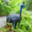

In [88]:
img = next(iter(train_iter))[0]
img

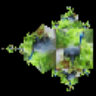

In [95]:
trans_img = Image.fromarray(transform(image=np.array(img))['image'])
trans_img

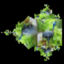

In [96]:
trans_img.resize((64, 64))